## Using Euclidean distance

## Implement KNN and weighted KNN  algorithm on Iris dataset.


Importing the libraries

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from collections import Counter

Importing the dataset

In [2]:

dataset = pd.read_csv('Iris.csv')   
X = dataset.iloc[:, 1:5].values  
y = dataset.iloc[:, 5].values
    

Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [4]:
print(X_train)

[[5.9 3.  4.2 1.5]
 [5.8 2.6 4.  1.2]
 [6.8 3.  5.5 2.1]
 [4.7 3.2 1.3 0.2]
 [6.9 3.1 5.1 2.3]
 [5.  3.5 1.6 0.6]
 [5.4 3.7 1.5 0.2]
 [5.  2.  3.5 1. ]
 [6.5 3.  5.5 1.8]
 [6.7 3.3 5.7 2.5]
 [6.  2.2 5.  1.5]
 [6.7 2.5 5.8 1.8]
 [5.6 2.5 3.9 1.1]
 [7.7 3.  6.1 2.3]
 [6.3 3.3 4.7 1.6]
 [5.5 2.4 3.8 1.1]
 [6.3 2.7 4.9 1.8]
 [6.3 2.8 5.1 1.5]
 [4.9 2.5 4.5 1.7]
 [6.3 2.5 5.  1.9]
 [7.  3.2 4.7 1.4]
 [6.5 3.  5.2 2. ]
 [6.  3.4 4.5 1.6]
 [4.8 3.1 1.6 0.2]
 [5.8 2.7 5.1 1.9]
 [5.6 2.7 4.2 1.3]
 [5.6 2.9 3.6 1.3]
 [5.5 2.5 4.  1.3]
 [6.1 3.  4.6 1.4]
 [7.2 3.2 6.  1.8]
 [5.3 3.7 1.5 0.2]
 [4.3 3.  1.1 0.1]
 [6.4 2.7 5.3 1.9]
 [5.7 3.  4.2 1.2]
 [5.4 3.4 1.7 0.2]
 [5.7 4.4 1.5 0.4]
 [6.9 3.1 4.9 1.5]
 [4.6 3.1 1.5 0.2]
 [5.9 3.  5.1 1.8]
 [5.1 2.5 3.  1.1]
 [4.6 3.4 1.4 0.3]
 [6.2 2.2 4.5 1.5]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [4.8 3.  1.4 0.1]
 [7.1 3.  5.9 2.1]
 [6.9 3.2 5.7 2.3]
 [6.5 3.  5.8 2.2]
 [6.4 2.8 5.6 2.1]
 [5.1 3.8 1.6 0.2]
 [4.8 3.4 1.6 0.2]
 [6.5 3.2 5.1 2. ]
 [6.7 3.3 5.

In [5]:
print(y_train)

['Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'

In [6]:
print(X_test)

[[5.8 2.8 5.1 2.4]
 [6.  2.2 4.  1. ]
 [5.5 4.2 1.4 0.2]
 [7.3 2.9 6.3 1.8]
 [5.  3.4 1.5 0.2]
 [6.3 3.3 6.  2.5]
 [5.  3.5 1.3 0.3]
 [6.7 3.1 4.7 1.5]
 [6.8 2.8 4.8 1.4]
 [6.1 2.8 4.  1.3]
 [6.1 2.6 5.6 1.4]
 [6.4 3.2 4.5 1.5]
 [6.1 2.8 4.7 1.2]
 [6.5 2.8 4.6 1.5]
 [6.1 2.9 4.7 1.4]
 [4.9 3.1 1.5 0.1]
 [6.  2.9 4.5 1.5]
 [5.5 2.6 4.4 1.2]
 [4.8 3.  1.4 0.3]
 [5.4 3.9 1.3 0.4]
 [5.6 2.8 4.9 2. ]
 [5.6 3.  4.5 1.5]
 [4.8 3.4 1.9 0.2]
 [4.4 2.9 1.4 0.2]
 [6.2 2.8 4.8 1.8]
 [4.6 3.6 1.  0.2]
 [5.1 3.8 1.9 0.4]
 [6.2 2.9 4.3 1.3]
 [5.  2.3 3.3 1. ]
 [5.  3.4 1.6 0.4]
 [6.4 3.1 5.5 1.8]
 [5.4 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [6.1 3.  4.9 1.8]
 [6.4 2.8 5.6 2.2]
 [5.2 2.7 3.9 1.4]
 [5.7 3.8 1.7 0.3]
 [6.  2.7 5.1 1.6]]


In [7]:
print(y_test)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor']


Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
print(X_train)

[[ 1.54399532e-02 -1.19254753e-01  2.25126850e-01  3.56381749e-01]
 [-9.98450310e-02 -1.04039491e+00  1.13559562e-01 -2.86480506e-02]
 [ 1.05300481e+00 -1.19254753e-01  9.50314227e-01  1.12644135e+00]
 [-1.36797986e+00  3.41315328e-01 -1.39259884e+00 -1.31208072e+00]
 [ 1.16828980e+00  1.11030287e-01  7.27179649e-01  1.38312788e+00]
 [-1.02212490e+00  1.03217045e+00 -1.22524790e+00 -7.98707650e-01]
 [-5.60984968e-01  1.49274053e+00 -1.28103155e+00 -1.31208072e+00]
 [-1.02212490e+00 -2.42210516e+00 -1.65358660e-01 -2.85334584e-01]
 [ 7.07149859e-01 -1.19254753e-01  9.50314227e-01  7.41411549e-01]
 [ 9.37719827e-01  5.71600368e-01  1.06188152e+00  1.63981441e+00]
 [ 1.30724937e-01 -1.96153508e+00  6.71396005e-01  3.56381749e-01]
 [ 9.37719827e-01 -1.27067995e+00  1.11766516e+00  7.41411549e-01]
 [-3.30414999e-01 -1.27067995e+00  5.77759173e-02 -1.56991317e-01]
 [ 2.09056967e+00 -1.19254753e-01  1.28501609e+00  1.38312788e+00]
 [ 4.76579890e-01  5.71600368e-01  5.04045072e-01  4.84725016e

In [10]:
print(X_test)

[[-0.09984503 -0.57982483  0.72717965  1.51147115]
 [ 0.13072494 -1.96153508  0.11355956 -0.28533458]
 [-0.44569998  2.64416573 -1.33681519 -1.31208072]
 [ 1.62942973 -0.34953979  1.39658338  0.74141155]
 [-1.0221249   0.80188541 -1.28103155 -1.31208072]
 [ 0.47657989  0.57160037  1.22923245  1.63981441]
 [-1.0221249   1.03217045 -1.39259884 -1.18373745]
 [ 0.93771983  0.11103029  0.50404507  0.35638175]
 [ 1.05300481 -0.57982483  0.55982872  0.22803848]
 [ 0.24600992 -0.57982483  0.11355956  0.09969522]
 [ 0.24600992 -1.04039491  1.00609787  0.22803848]
 [ 0.59186487  0.34131533  0.39247778  0.35638175]
 [ 0.24600992 -0.57982483  0.50404507 -0.02864805]
 [ 0.70714986 -0.57982483  0.44826143  0.35638175]
 [ 0.24600992 -0.34953979  0.50404507  0.22803848]
 [-1.13740989  0.11103029 -1.28103155 -1.44042398]
 [ 0.13072494 -0.34953979  0.39247778  0.35638175]
 [-0.44569998 -1.04039491  0.33669414 -0.02864805]
 [-1.25269487 -0.11925475 -1.33681519 -1.18373745]
 [-0.56098497  1.95331061 -1.39

Euclidean distance function


In [11]:
def euclidean_distance(point1, point2):
    distance = 0.0
    for i in range(len(point1)):
        distance += (point1[i] - point2[i]) ** 2
    return math.sqrt(distance)

 K nearest neighbors

In [18]:
def get_neighbors(X_train, y_train, test_instance, k):
    distances = []
    for i in range(len(X_train)):
        dist = euclidean_distance(X_train[i], test_instance)
        distances.append((y_train[i], dist))  # (label, distance)
    distances.sort(key=lambda x: x[1])  # Sort by distance
    neighbors = [distances[i][0] for i in range(k)]  # Get the labels of the k-nearest neighbors
    return neighbors

Predicting a new result

In [19]:
def predict_classification(X_train, y_train, test_instance, k):
    neighbors = get_neighbors(X_train, y_train, test_instance, k)
    prediction = Counter(neighbors).most_common(1)[0][0]  
    return prediction

In [20]:
k = 5 

In [21]:
new_instance = np.array([4.1, 2.3, 3.1, 5]) 
new_instance_scaled = sc.transform([new_instance])  

In [27]:
predicted_label = predict_classification(X_train, y_train, new_instance_scaled[0], k)

print( predicted_label)

Iris-virginica


Predicting the Test set results

In [30]:
y_pred = [predict_classification(X_train, y_train, x_test, k) for x_test in X_test]
results = np.concatenate((np.array(y_pred).reshape(len(y_pred), 1), np.array(y_test).reshape(len(y_test), 1)), axis=1)
print( results)


[['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']


Making the Confusion Matrix

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score

cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Accuracy: 0.9736842105263158



Visualising the Training set results

C:\Users\DT USER\AppData\Local\Temp\ipykernel_4552\3331124544.py:32: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


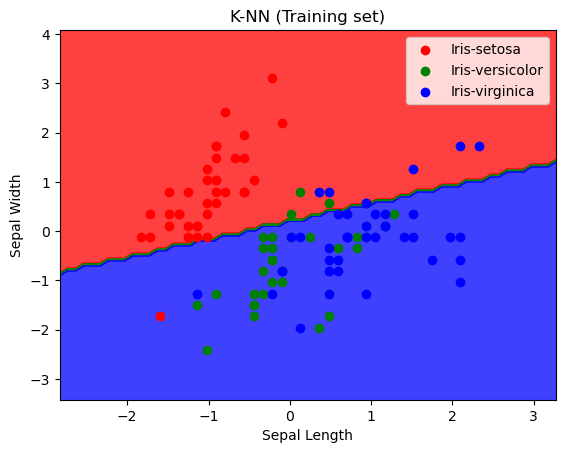

In [66]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

# Use the first two features for visualization (Sepal Length and Sepal Width)
X_set, y_set = X_train, y_train

# Create a mapping from species to integers
label_mapping = {label: idx for idx, label in enumerate(np.unique(y_set))}
y_set_mapped = np.vectorize(label_mapping.get)(y_set)

# Create a mesh grid for the first two features
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.1),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.1))

# Prepare the mesh grid for prediction
mesh_points = np.c_[X1.ravel(), X2.ravel(), np.zeros_like(X1.ravel()), np.zeros_like(X1.ravel())]

# Predict class for each point in the mesh grid
Z = classifier.predict(sc.transform(mesh_points)).reshape(X1.shape)

# Map the predicted labels back to the integer format if needed
Z_mapped = np.vectorize(label_mapping.get)(Z)

# Plotting the decision boundary
plt.contourf(X1, X2, Z_mapped, alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Scatter plot for the training set
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c=ListedColormap(('red', 'green', 'blue'))(i), label=j)

plt.title('K-NN (Training set)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()


Visualising the Test set results

C:\Users\DT USER\AppData\Local\Temp\ipykernel_4552\4230561004.py:29: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


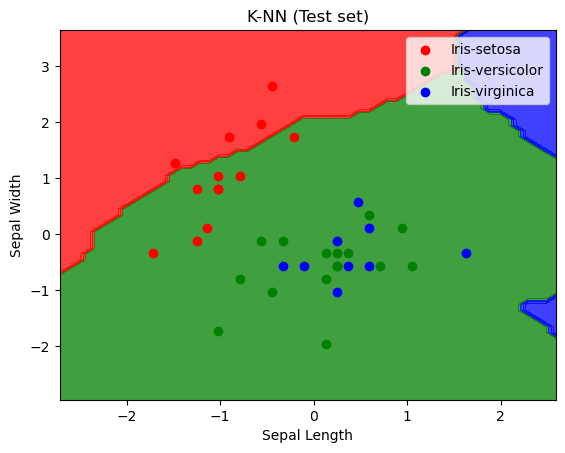

In [68]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

# Use the original test set (with four features) for predictions
X_set, y_set = X_test, y_test  # Use all features for prediction

# Create a mesh grid for the first two features (Sepal Length and Sepal Width)
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.1),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.1))

# Prepare mesh points for prediction using all four features
mesh_points = np.array([[x1, x2, 0, 0] for x1, x2 in zip(X1.ravel(), X2.ravel())])

# Predict class for each point in the mesh grid
Z = classifier.predict(mesh_points).reshape(X1.shape)

# Create a mapping from species to integers
label_mapping = {label: idx for idx, label in enumerate(np.unique(y_set))}
Z_mapped = np.vectorize(label_mapping.get)(Z)

# Plotting the decision boundary
plt.contourf(X1, X2, Z_mapped, alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Scatter plot for the test set
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c=ListedColormap(('red', 'green', 'blue'))(i), label=j)

plt.title('K-NN (Test set)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()
